In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [12]:
# Carregar os dados
train_data = pd.read_csv('/content/train.csv') #Caminho do upload de arquivo
test_data = pd.read_csv('/content/test.csv') #Caminho do upload de arquivo

# Visualizar as primeiras linhas do conjunto de dados de treino
print(train_data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [13]:
# Separar as características (pixels) e os rótulos (dígitos)
X = train_data.drop(columns='label')
y = train_data['label']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Inicializar o classificador de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treinar o classificador
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

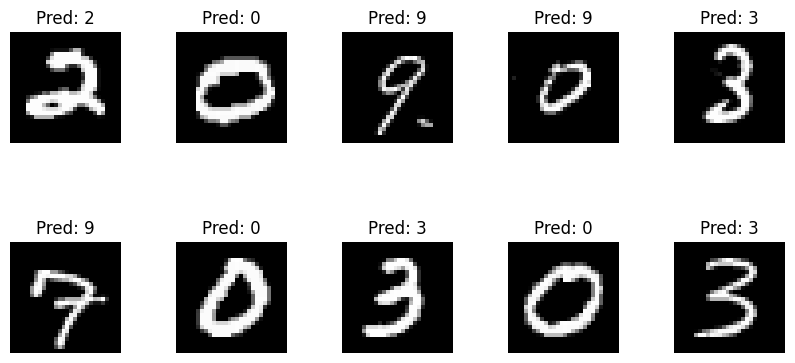

In [15]:
# Fazer previsões no conjunto de teste
test_predictions = clf.predict(test_data)

# Visualizar algumas previsões
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(test_data.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Pred: {test_predictions[i]}')
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)
plt.show()


In [16]:
# Fazer previsões no conjunto de validação
y_pred = clf.predict(X_val)

# Calcular a acurácia, precisão e recall do modelo
# Foi acrescentado outras métricas porém o score utilizado na competição é apenas o da acurácia
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')

print(f'Acurácia do modelo: {accuracy * 100:.2f}%')
print(f'Precisão do modelo: {precision * 100:.2f}%')
print(f'Recall do modelo: {recall * 100:.2f}%')

Acurácia do modelo: 85.25%
Precisão do modelo: 85.26%
Recall do modelo: 85.25%
